Wine classification
This project uses white wine dataset taken from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

In [6]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import tree
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
winedata = pd.read_csv("/Users/vidyasridhar/Downloads/winequality/winequality-white.csv", sep=';')
#len(winedata.columns)
#winedata.head()
#winedata[0:3]
winedata.describe()




In [61]:
print winedata.shape[0]

4898


df_ndim = winedata.ndim
print df_ndim

In [9]:
winedata.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
winedata.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [11]:
print winedata['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [12]:
#check if there are any null values
#get information about the data types
winedata.isnull().sum()
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


[Text(0,0.5,'fixed acidity'),
 Text(0,1.5,'volatile acidity'),
 Text(0,2.5,'citric acid'),
 Text(0,3.5,'residual sugar'),
 Text(0,4.5,'chlorides'),
 Text(0,5.5,'free sulfur dioxide'),
 Text(0,6.5,'total sulfur dioxide'),
 Text(0,7.5,'density'),
 Text(0,8.5,'pH'),
 Text(0,9.5,'sulphates'),
 Text(0,10.5,'alcohol'),
 Text(0,11.5,'quality')]

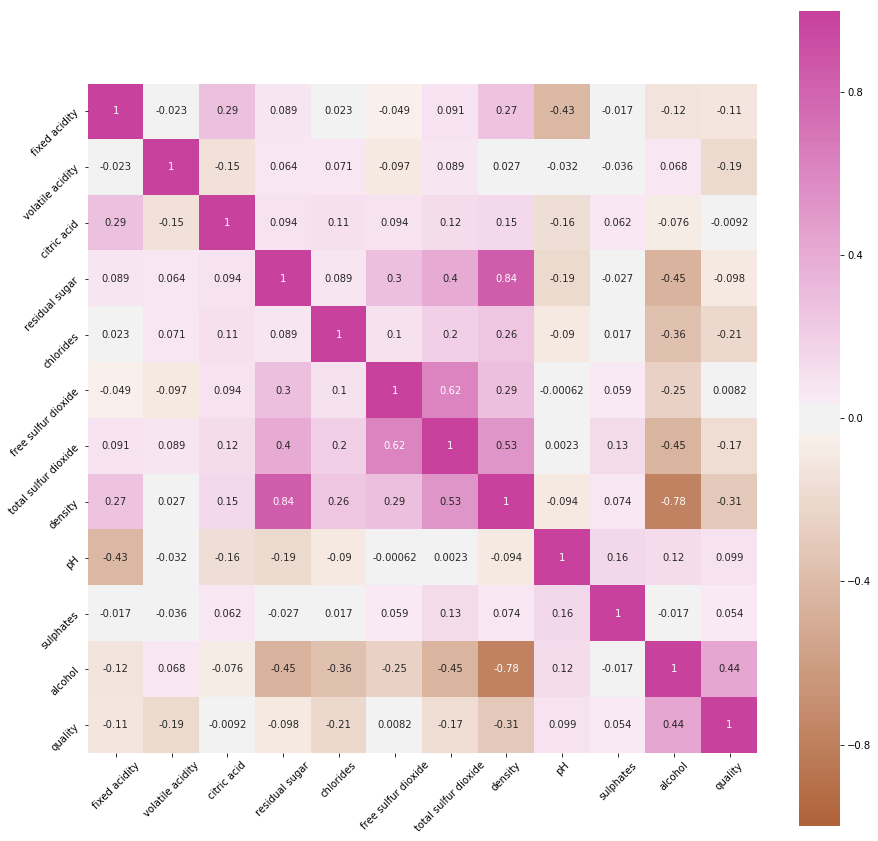

In [13]:
#correlation heat map
#use seaborn and matplotlib
correlation = winedata.corr()
plt.figure(figsize=(15,15))
axis = sns.heatmap(correlation, vmin=-1, vmax=1, annot = True, cmap=sns.diverging_palette(30, 330, n=200), square=True)
labels = axis.get_xticklabels()
axis.set_xticklabels(labels, rotation=45)
ylabels = axis.get_yticklabels()
axis.set_yticklabels(ylabels, rotation=45)

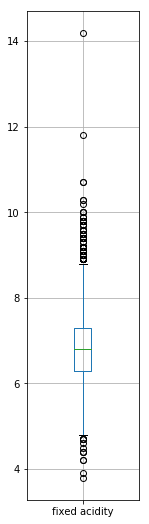

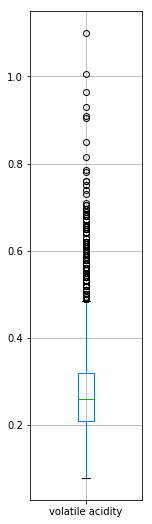

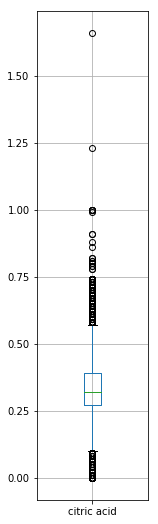

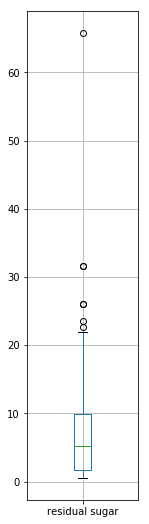

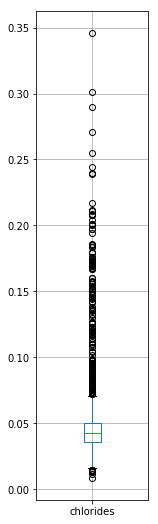

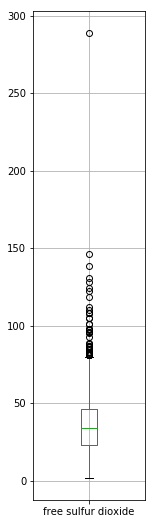

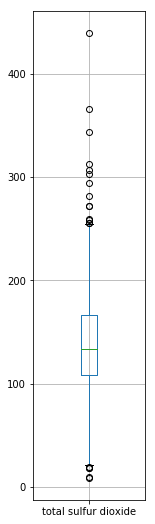

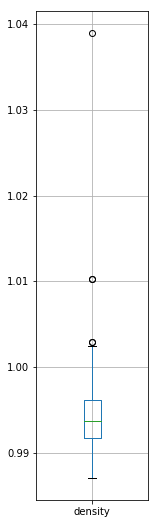

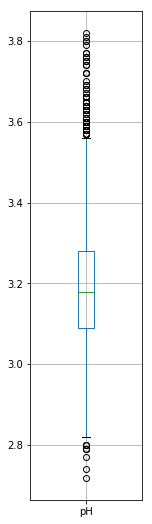

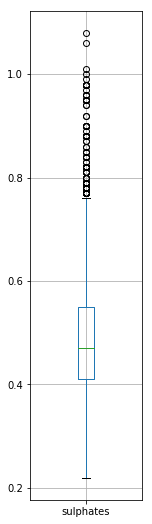

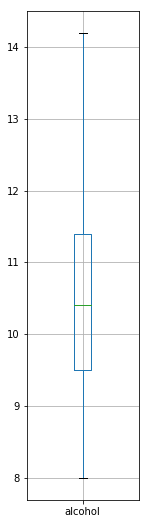

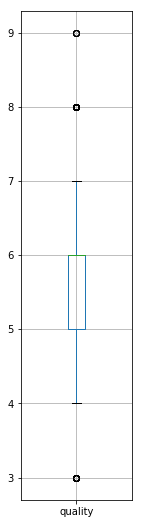

In [14]:
#draw boxplot using matplot

for column in winedata:
    plt.figure(figsize=(2,9))
    winedata.boxplot([column])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b8e5110>,
      dtype=object)

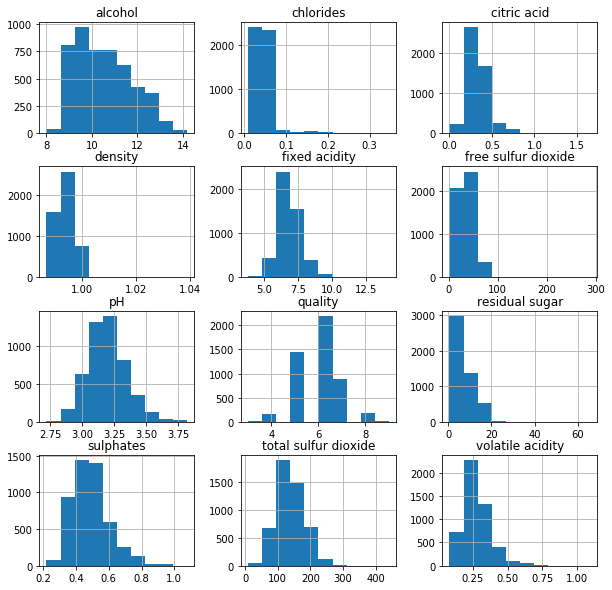

In [15]:
#histograms
winedata.hist(figsize=(10,10))

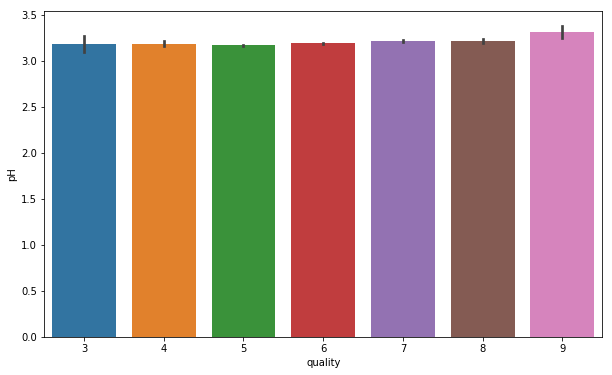

In [16]:
#barplots
#check the correlation for ++ anmd -- correlated from heatmap
fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'alcohol', data = winedata)
#sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = winedata)
#sns.barplot(x = 'quality', y = 'density', data = winedata)
#sns.barplot(x = 'quality', y = 'chlorides', data = winedata)
sns.barplot(x = 'quality', y = 'pH', data = winedata)


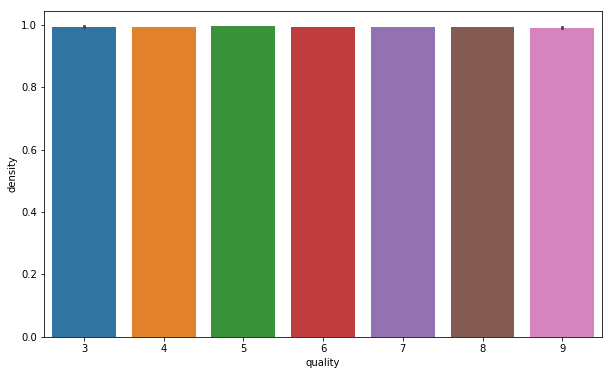

In [17]:
fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'alcohol', data = winedata)
#sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = winedata)
sns.barplot(x = 'quality', y = 'density', data = winedata)
#sns.barplot(x = 'quality', y = 'chlorides', data = winedata)

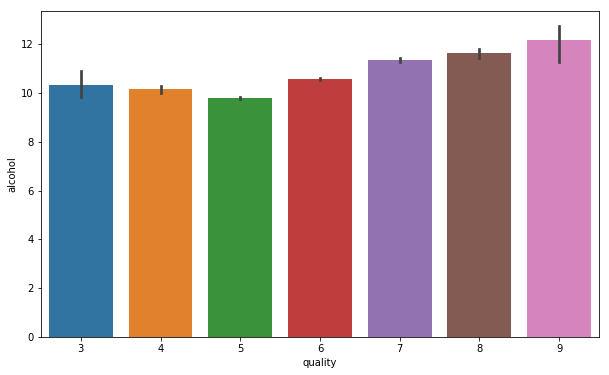

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = winedata)


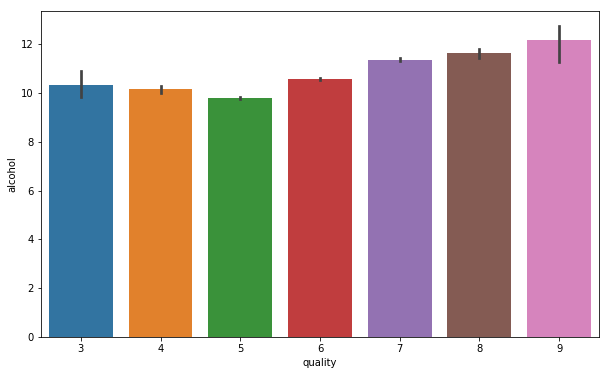

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = winedata)
#sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = winedata)
#sns.barplot(x = 'quality', y = 'density', data = winedata)
#sns.barplot(x = 'quality', y = 'chlorides', data = winedata)

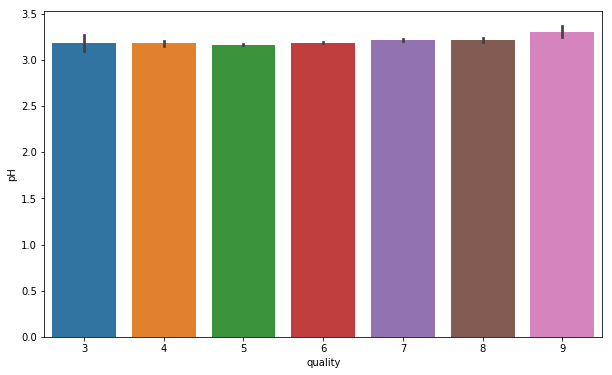

In [20]:
fig = plt.figure(figsize = (10,6))
#sns.barplot(x = 'quality', y = 'alcohol', data = winedata)
#sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = winedata)
#sns.barplot(x = 'quality', y = 'density', data = winedata)
sns.barplot(x = 'quality', y = 'pH', data = winedata)

/opt/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


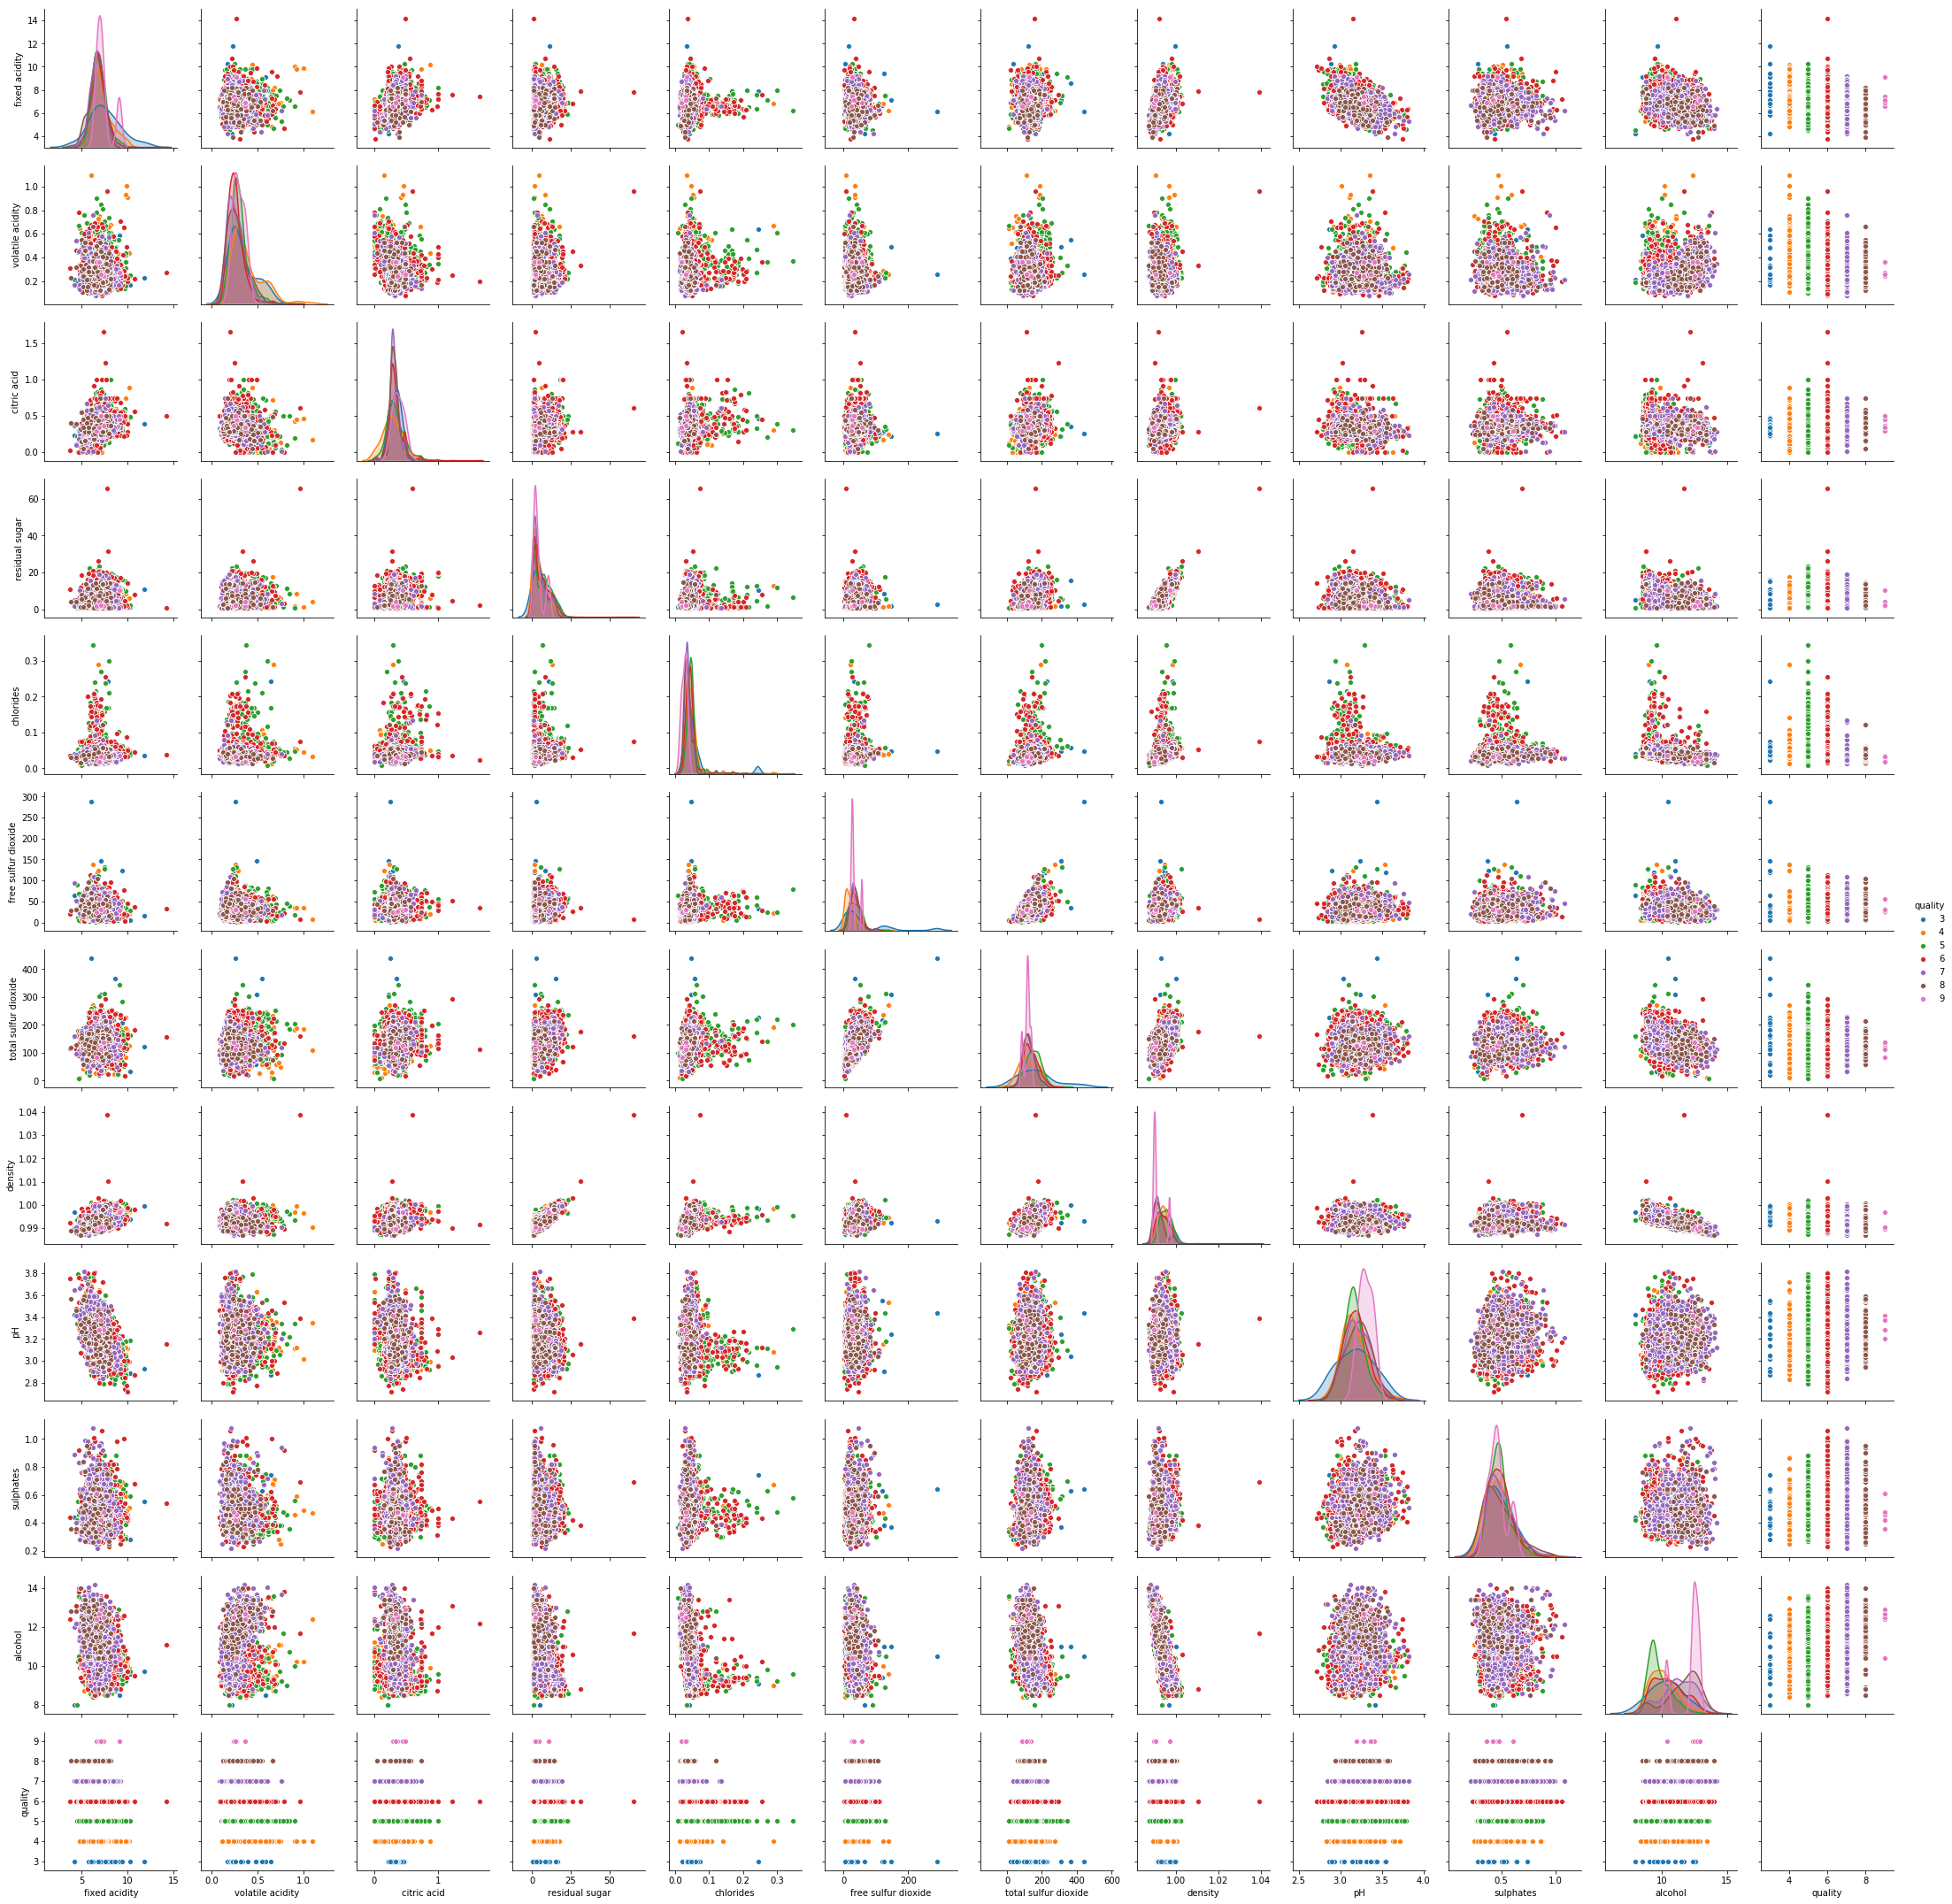

In [21]:
#pairplot
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(winedata, hue="quality")

In [ ]:
#feature importance
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

In [22]:
#what are the top features contributing most to good wine quality - alcohol(+), density(-ve), chlorides(-ve), volatile acidity(-ve)

In [23]:
#outlier detection and data preprocessing
#there is outliers in the dataset and also class imbalance. so EDA includes methods to tackle this
#should i normalize the data? 

#use IQR and then sklearn.covariance.EllipticEnvelope for outlier detection
#import numpy as np
Q1 = winedata.quantile(0.25)
Q3 = winedata.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (3 * IQR)
max_limit = Q3 + (3 * IQR)

#print((winedata < (Q1 - 1.5 * IQR)) |(winedata > (Q3 + 1.5 * IQR)))

#checks if one of the conditions is True for any one of the columns in each row. These will be the outliers.The ~ will exempt these rows and all the other rows to the modified dataframe.
#we are almost losing 1000 rows in this process. and only rows with quality 6,5,7,4 remains. so probably not a good idea to do remove outliers as it will reduce training set

outliers_removed = winedata[~((winedata < min_limit) |(winedata > max_limit)).any(axis = 1)]
only_outliers = winedata[((winedata < min_limit) | (winedata > max_limit)).any(axis = 1)]
only_outliers.describe()
#outliers_removed.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,6.963942,0.396466,0.412933,6.243029,0.111120,40.192308,150.016827,0.994932,3.130481,0.510913,9.985817,5.350962
std,1.118605,0.199156,0.248739,6.661096,0.064072,30.023204,56.317989,0.004242,0.146429,0.155133,1.154304,0.899221
min,4.700000,0.140000,0.000000,0.800000,0.020000,5.000000,9.000000,0.987220,2.870000,0.250000,8.700000,3.000000
25%,6.375000,0.247500,0.240000,1.600000,0.047750,22.750000,110.750000,0.993120,3.027500,0.410000,9.200000,5.000000
50%,6.700000,0.330000,0.360000,4.950000,0.110000,34.000000,148.500000,0.994320,3.110000,0.480000,9.500000,5.000000
75%,7.300000,0.490000,0.520000,8.525000,0.157000,50.250000,183.000000,0.996578,3.202500,0.560000,10.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.560000,1.080000,13.800000,8.000000


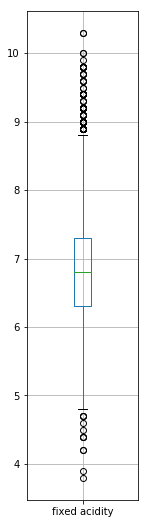

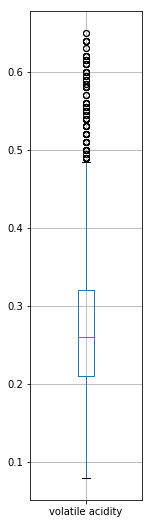

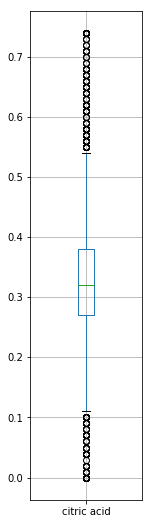

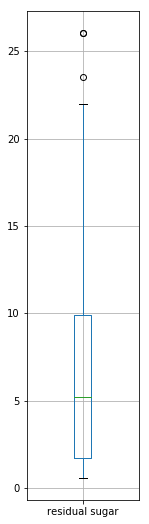

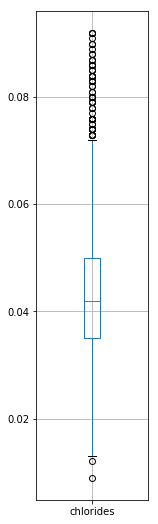

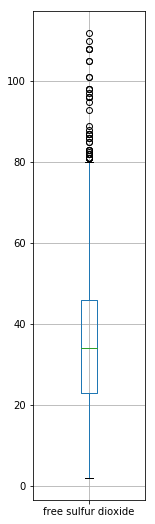

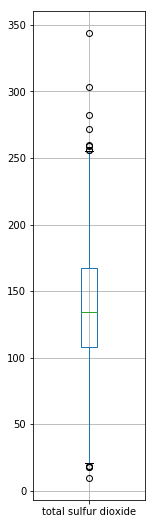

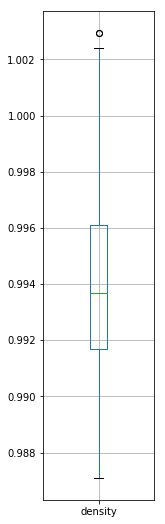

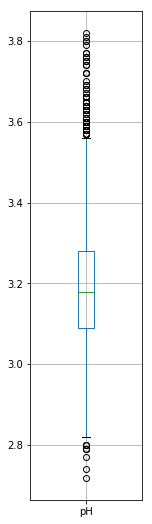

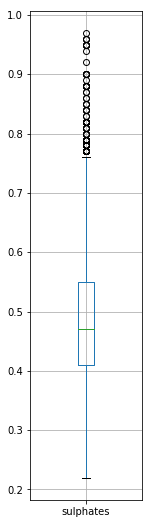

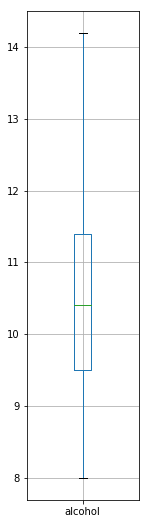

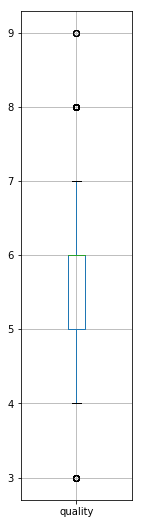

In [24]:
#draw boxplots with the modified dataset(after removing outliers to check how many outliers exist and the spread of the data. chlorides, fixed acidity, total sul dioxide looks better, the extreme outliers have been removed.)

for column in outliers_removed:
    plt.figure(figsize=(2,9))
    outliers_removed.boxplot([column])

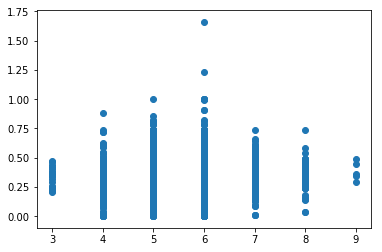

In [25]:
#draw a scatter plot with citric acid and quality

plt.scatter(winedata['quality'], winedata['citric acid'])
plt.show()

In [26]:
#try another method of outlier detection
#remove citric acid column. it has -0.0092 correlation with quality
citacid_removed = winedata.drop('citric acid', axis = 1)

#free sulfur dioxide. ther is just one point above 150. can replcae that by the mean
#do the same for residual sugar and free sulfur dioxide
fsd_mean = winedata['free sulfur dioxide'].mean()
winedata2 = winedata.copy()
winedata2.loc[winedata2['free sulfur dioxide'] > 150, 'free sulfur dioxide'] = fsd_mean
winedata2.loc[winedata2['total sulfur dioxide'] > 300, 'total sulfur dioxide'] = winedata2['total sulfur dioxide'].mean()
winedata2.loc[winedata2['residual sugar'] > 60, 'residual sugar'] = winedata2['residual sugar'].mean()
winedata2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.379286,0.045772,35.256290,138.106710,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.000490,0.021848,16.616178,41.839835,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,146.500000,294.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [27]:
winedata[winedata.quality > 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [28]:
#data splitting. train 80%, test 20%
#k fold cross validation


x_data = winedata.drop('quality', axis = 1)
y_label = winedata['quality']

#for name in list(train_data):
#    print name

#for col in train_data.columns:
#    print col


In [29]:
#scaling the values between -1 to 1. this is to get a relatively normal disribution
#Min max scaler will put the values between range 0 to 1 and does not distort the values. doesn't treat outliers any different.
sc = StandardScaler()
#test_data_sc = sc.fit_transform(test_data)

In [40]:
#random forest classifier
#try random forest with original dataset (winedata)
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0, random_state=35)
train_data = sc.fit_transform(train_data)
rfc = RandomForestClassifier(n_estimators=25)
op = cross_val_score(estimator=rfc, X=train_data, y=train_label, cv=5)
print op
print ("Accuracy of model" , op.mean() * 100)

[0.66666667 0.67787971 0.65918367 0.67382413 0.66564417]
('Accuracy of model', 66.86396714743007)


In [41]:
#try random forest with modified dataset (winedata2)
#5 fold cross validation



x_data2 = winedata2.drop('quality', axis = 1)
y_label2 = winedata2['quality']
train_data2, test_data2, train_label2, test_label2 = train_test_split(x_data2, y_label2, test_size=0, random_state=35)
train_data2 = sc.fit_transform(train_data2)
rfc = RandomForestClassifier(n_estimators=25)
op2 = cross_val_score(estimator=rfc, X=train_data2, y=train_label2, cv=5)
print op2
print ("Accuracy of model" , op2.mean() * 100)

[0.68399592 0.65647299 0.66428571 0.67177914 0.67893661]
('Accuracy of model', 67.10940739966462)


In [39]:
#try random forest with modified dataset (outliers_removed)


x_data3 = outliers_removed.drop('quality', axis = 1)
y_label3 = outliers_removed['quality']
train_data3, test_data3, train_label3, test_label3 = train_test_split(x_data3, y_label3, test_size=0, random_state=35)
train_data3 = sc.fit_transform(train_data3)
rfc = RandomForestClassifier(n_estimators=25)
op3 = cross_val_score(estimator=rfc, X=train_data3, y=train_label3, cv=5)
print op3
print ("Accuracy of model" , op3.mean() * 100)

[0.67693943 0.66347178 0.69829424 0.69263607 0.70374332]
('Accuracy of model', 68.70169671561153)


In [33]:
#use decision trees - no CV. original DS
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0.2, random_state=35)

train_data = sc.fit_transform(train_data)
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(train_data, train_label)
predicted = dtc.predict(test_data)
#tree_op = cross_val_score(estimator=dtc, X=train_data, y=train_label, cv = 5)
print("Accuracy:",metrics.accuracy_score(test_label, predicted))
#print ("Accuracy of model" , tree_op.mean() * 100)
print dtc

('Accuracy:', 0.23775510204081632)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [34]:
#decision tree 5 fold CV - original dataset
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0, random_state=35)
train_data = sc.fit_transform(train_data)
dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_data, train_label)
#predicted = dtc.predict(test_data)
tree_op = cross_val_score(estimator=dtc, X=train_data, y=train_label, cv = 5)
#print("Accuracy:",metrics.accuracy_score(test_label, predicted))
print ("Accuracy of model" , tree_op.mean() * 100)

('Accuracy of model', 60.55635412642383)


In [35]:
#decision tree 5 fold CV - replace means
train_data2, test_data2, train_label2, test_label2 = train_test_split(x_data2, y_label2, test_size=0, random_state=35)
train_data2 = sc.fit_transform(train_data2)
dtc = DecisionTreeClassifier()
#dtc = dtc.fit(train_data2, train_label2)
#predicted = dtc.predict(test_data)
tree_op2 = cross_val_score(estimator=dtc, X=train_data2, y=train_label2, cv = 5)
#print("Accuracy:",metrics.accuracy_score(test_label, predicted))
print ("Accuracy of model" , tree_op2.mean() * 100)

('Accuracy of model', 60.80150262014714)


In [36]:
#decision tree 5 fold CV - outliers removed
train_data3, test_data3, train_label3, test_label3 = train_test_split(x_data3, y_label3, test_size=0, random_state=35)
train_data3 = sc.fit_transform(train_data3)
dtc = DecisionTreeClassifier()
#dtc = dtc.fit(train_data, train_label)
#predicted = dtc.predict(test_data)
tree_op3 = cross_val_score(estimator=dtc, X=train_data3, y=train_label3, cv = 5)
#print("Accuracy:",metrics.accuracy_score(test_label, predicted))
print ("Accuracy of model" , tree_op3.mean() * 100)

('Accuracy of model', 61.87664230964172)


In [37]:
#comparing decision trees and random forests
#decision trees performed poorly compared to RF. This could be due to overfitting, imbalanced data, and tree size. To prove this, we can try using DT with a smaller tree depth
#decision tree 5 fold CV - original dataset
#different max depths were considered and the prediction accurcy did not change, 50, 500, 5000
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0.2, random_state=35)

dtc = tree.DecisionTreeClassifier(max_depth=5000)
dtc = dtc.fit(train_data, train_label)
predicted = dtc.predict(test_data)
#tree_op = cross_val_score(estimator=dtc, X=train_data, y=train_label, cv = 5)
print("Accuracyy:",metrics.accuracy_score(test_label, predicted)*100)
#print ("Accuracy of model" , tree_op.mean() * 100)

('Accuracyy:', 58.16326530612245)


In [48]:
#predicting on training set to see of rbf kernel works
from sklearn import svm

train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0.1, random_state=35)
train_data = sc.fit_transform(train_data)
svc = svm.SVC(C=500, kernel='rbf')
svc = svc.fit(train_data, train_label)
svc_predict = svc.predict(train_data)
#print svc
print("Accuracy:",metrics.accuracy_score(train_label, svc_predict)*100)
print svc



('Accuracy:', 94.75952813067151)
SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [56]:
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0.1, random_state=35)
train_data = sc.fit_transform(train_data)
svc = svm.SVC(C=500, kernel='rbf')
svc = svc.fit(train_data, train_label)
svc_predict = svc.predict(test_data)
#print svc
print("Accuracy:",metrics.accuracy_score(test_label, svc_predict)*100)
print('Confusion matrix:\n',metrics.confusion_matrix(test_label, svc_predict))
print svc

('Accuracy:', 25.71428571428571)
('Confusion matrix:\n', array([[  0,  16,   0,   0,   0,   0],
       [  0, 126,   0,   0,   0,   0],
       [  0, 210,   0,   0,   0,   0],
       [  0, 115,   0,   0,   0,   0],
       [  0,  22,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0]]))
SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [57]:
train_data2, test_data2, train_label2, test_label2 = train_test_split(x_data2, y_label2, test_size=0.2, random_state=35)
train_data2 = sc.fit_transform(train_data2)
svc = svm.SVC(C=500, kernel='rbf')
svc = svc.fit(train_data2, train_label2)
svc_predict = svc.predict(test_data2)
#print svc
print("Accuracy:",metrics.accuracy_score(test_label2, svc_predict)*100)
print('Confusion matrix:\n',metrics.confusion_matrix(test_label2, svc_predict))
print svc

('Accuracy:', 43.57142857142857)
('Confusion matrix:\n', array([[  0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,  31,   0,   0,   0],
       [  0,   0,   0, 279,   0,   0,   0],
       [  0,   0,   0, 427,   0,   0,   0],
       [  0,   0,   0, 203,   0,   0,   0],
       [  0,   0,   0,  37,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]]))
SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [58]:
train_data3, test_data3, train_label3, test_label3 = train_test_split(x_data3, y_label3, test_size=0.2, random_state=35)
train_data3 = sc.fit_transform(train_data3)
svc = svm.SVC(C=500, kernel='rbf')
svc = svc.fit(train_data3, train_label3)
svc_predict = svc.predict(test_data3)
#print svc
print("Accuracy:",metrics.accuracy_score(test_label3, svc_predict)*100)
print('Confusion matrix:\n',metrics.confusion_matrix(test_label3, svc_predict))
print svc

('Accuracy:', 44.136460554371006)
('Confusion matrix:\n', array([[  0,   0,   0,   3,   0,   0],
       [  0,   0,   0,  33,   0,   0],
       [  0,   0,   0, 263,   0,   0],
       [  0,   0,   0, 414,   0,   0],
       [  0,   0,   0, 186,   0,   0],
       [  0,   0,   0,  39,   0,   0]]))
SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [59]:
#svm - 5 fold cv
train_data3, test_data3, train_label3, test_label3 = train_test_split(x_data3, y_label3, test_size=0, random_state=35)
train_data3 = sc.fit_transform(train_data3)
svc = svm.SVC(C=500, kernel='rbf')
#svc = svc.fit(train_data3, train_label3)
print svc
tree_op = cross_val_score(estimator=svc, X=train_data3, y=train_label3, cv = 5)
print tree_op
print ("Accuracy of model" , tree_op.mean() * 100)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[0.60998937 0.61235357 0.63859275 0.62113127 0.62887701]
('Accuracy of model', 62.21887933047775)


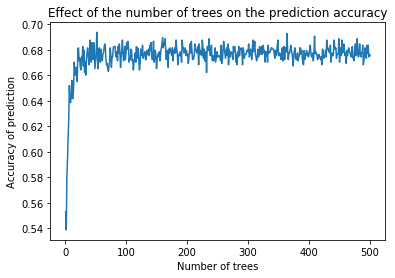

In [46]:
train_data, test_data, train_label, test_label = train_test_split(x_data, y_label, test_size=0.2, random_state=35)
n = 500
accuracy = [0]*n

for i in range(n):
    classifier = RandomForestClassifier(n_estimators=i+1)
    classifier = classifier.fit(train_data, train_label)
    predictions = classifier.predict(test_data)
    accuracy[i] = metrics.accuracy_score(test_label, predictions)

plt.plot(range(1, n+1), accuracy)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of prediction")
plt.title("Effect of the number of trees on the prediction accuracy")
plt.show()
